# Métodos III - Derivadas 


## Gradiente, matriz jacobiana, funciones diferenciables


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

Enero 2019


In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Tue Feb 12 20:32:35 2019


### Objectivos


Presentar los conceptos de

* gradiente y matriz jacobiana

* definición de función diferenciable

Discutir sobre:

* La condición suficiente de diferenciabilidad

* las bondades de las funciones diferenciables


In [2]:
# general imports
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import graph_utils as gf

figsize = 6, 3.8
cmap    = 'hot'

### Gradiente

Para una función escalar $f(x, y)$ diferenciable, hemos dado el desarrollo de Taylor en un punto $(x_0, y_0)$ si nos desplazamos en el espacio origen un vector $(v _x, v_y)$.

$$
f((x_0, y_0) + (v_x, v_y)) = f(x_0, y_0) + f'_x(x_0, y_0) v_x + f'_y (x_0, y_0) v_y
$$


o lo que es lo mismo:

$$
f((x_0, y_0) + (v_x, v_y)) = f(x_0, y_0) + \left(f'_x(x_0, y_0), \, f'_y (x_0, y_0) \right) \, (v_x, v_y)
$$

Donde la expresión:

$$
\left(f'_x(x_0, y_0), \, f'_y (x_0, y_0) \right) \, (v_x, v_y)
$$

Es el producto vectorial entre $(v_x, v_y)$, el vector desplazamiento; y otro vector, el **gradiente**, $\nabla f (x_0, y_0)$,  cuyas componentes son las derivadas parciales:

$$
\nabla f(x_0, y_0) = \left(f'_x(x_0, y_0), \, f'_y (x_0, y_0) \right) = \left( \frac{\partial f(x_0, y_0)}{\partial x}, \frac{f (x_0, y_0)}{\partial y} \right)
$$




Supongo que ya has visto el gradiente en Física. En el electromagnetismo definimos el campo eléctrico como (menos) el gradiente del potencial.

$$
{\bf E}({\bf x}) = - \nabla V({\bf x})
$$

Puedes revisar que efectivamente es así, a partir de la definición de potencial y campo eléctrico que vimos en la sección sobre funciones escalares y vectoriales.



*Ejemplo*: La siguiente figura nos muestra los conjuntos de nivel del potencial eléctrico de una carga.
También nos muestra  el campo eléctrico, (el gradiente cambiado de signo), en un determinado punto $(x_0, y_0)$

*Explora* y cambia el punto y observa como cambia el gradiente.

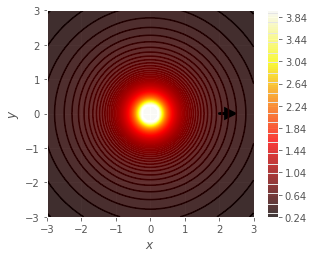

In [3]:
x0, y0 =  2, 0.
V  = lambda x, y : 1/(x*x + y*y)**(1/2)
Ex = lambda x, y : x/(x*x + y*y)**(3/2)
Ey = lambda x, y : y/(x*x + y*y)**(3/2)
gf.contour(V, contours = 100, zlim=(0., 4));
gf.arrow(x0, y0, Ex(x0, y0), Ey(x0, y0));


Por supuesto, lo que hemos visto para funciones escalares de dos dimensiones para para cualquier dimensión.

Sea una función $f({\bf x})$ escalar definida en $\mathrm{R}^n$, diremos que es "suave", si tiene desarrollo de Taylor de primer orden, esto es, la función en un punto ${\bf x}$ próximo a ${\bf x}_0$, relacionados por un vector "pequeño", ${\bf v}$ por ${\bf x} = {\bf x}_0 + {\bf v}$, se puede aproximar por un hyper-plano.

$$
f({\bf x}_0 + {\bf v} ) = f({\bf x_0}) + \nabla f ({\bf x_0}) \, {\bf v}
$$

donde las derivadas parciales son las pendientes en cada dirección, $f'_i ({\bf x}_0)$.


*Ejercicio*: Calcula el gradiente de las siguientes funciones:

1. $f(x, y) = e^{x + y}$

2. $f(x, y) = \cos x \sin y$

*Solución*:
    
1. $\nabla f(x, y) = \left( e^{x+y}, \; e^{x+y} \right)$

2. $\nabla f(x, y) = \left( -\sin x \cos y, \; \cos x \cos y \right)$



El gradiente nos aporta más información sobre la función. Fíjate:

El término:
$$
\nabla f ({\bf x}_0) \, {\bf v} 
$$

es un producto escalar que podemos reescribir cómo:

$$
\nabla f ({\bf x}_0) \, {\bf v} = || \nabla f({\bf x}_0) || \, ||{\bf v}|| \, \cos \theta
$$

donde $\theta$ es el ángulo que forman los dos vectores.



Tenemos ahora dos casos:

1. los dos vectores son paralelos, si van en la misma dirección y sentido, es máximo. 

Esto es, si el desplazamiento ${\bf v}$ va en la misma dirección y sentido que el gradiente, el cambio de la función es máximo.

2. los dos vectores son perpendiculares, el término es nulo.

O lo que es lo mismo, la valor función no cambiará ortogonalmente al gradiente.






Regresemos a la relación entre el campo y el potencial eléctrico:
      
$$
{\bf E}({\bf x}) = - \nabla V({\bf x})
$$

El gradiente entonces indica la dirección y sentido en el que el potencial eléctrico *decae* más rápidamente.



Ahora recordemos los conjuntos de nivel, que son aquellos puntos del espacio inicial cuya valor de la función es $c$.

El gradiente va a ser normal a los conjuntos de nivel, porque en los conjuntos de nivel el valor de la función no cambia.

*Ejemplo*: La siguiente figura nos muestra los conjuntos de nivel de un dipolo eléctrico. También nos muestra  el campo eléctrico, (el gradiente cambiado de signo), en un determinado punto $(x_0, y_0)$

*Explora* y cambia el punto y observa como cambia el gradiente.

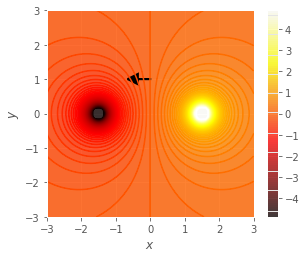

In [4]:
from common_functions import edipole
x0, y0 = 0, 1.
V, Ex, Ey = edipole(1., 1.5, 0., -1.5, 0.)
gf.contour(V, contours= 100, zlim=(-5., 5.))
gf.arrow(x0, y0, Ex(x0, y0), Ey(x0, y0));

La siguiente celda te permite dibujar el potencial de un conjunto de cargas. El dibujo corresponde a dos cargas negativas situadas en el eje vertical separadas por 2 unidades.

*Explora* y cambia el punto y observa como cambia el potencial y el gradiente. 

*Explora* y cambia el sistema de cargas para ver como cambia el potencial y el gradiente en un punto.

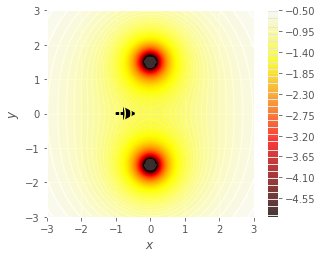

In [5]:
from common_functions import esystem
x0, y0 = -1., 0.
charges = [(-1., 0, 1.5), (-1., 0, -1.5)]
V, Ex, Ey = esystem(charges)
gf.contour(V, contours = 100, zlim=(-5., 5.))
gf.arrow(x0, y0, Ex(x0, y0), Ey(x0, y0));

### Matriz Jacobiana

Una función vectorial es diferenciable, si y solo si, lo son cada una de sus funciones componentes.

Sea una función vectorial, ${\bf f}({\bf x})$ de $\mathrm{R}^n \to \mathrm{R}^m$, que es diferenciable en un punto ${\bf x}_0$

cada uno de sus funciones componentes debe ser diferenciable, pongamoslas una debajo de la otra:

$$
f_1( {\bf x}_0 + {\bf v}) \approx f_1({\bf x}_0) + \nabla f_1({\bf x}_0) {\bf v}
$$
$$
\dots
$$
$$
f_m( {\bf x}_0 + {\bf v}) \approx f_i({\bf x}_0) + \nabla f_m({\bf x}_0) {\bf v}
$$

O también:

$$
f_1( {\bf x}_0 + {\bf v}) \approx f_1({\bf x}_0) + \sum_{i=1, n} \frac{\partial f_1({\bf x}_0)}{\partial x_i} v_i
$$
$$
\dots
$$
$$
f_m( {\bf x}_0 + {\bf v}) \approx f_m({\bf x}_0) + \sum_{i=1, n} \frac{\partial f_m({\bf x}_0)}{\partial x_i} v_i
$$



Que podemos reescribir de forma matricial, colocando ${\bf v}$, ${\bf f}({\bf x}_0 + {\bf v})$ y ${\bf f}({\bf x}_0)$ como vectores columnas.

$$
{\bf f} ({\bf x}_0 + {\bf v}) = {\bf} f({\bf x}_0) + {\bf Df}({\bf x}_0) \, {\bf v}
$$

Donde ${\bf Df}({\bf x}_0)$ es una matriz cuyos elementos son:

$$
{\bf Df}_{ij}({\bf x}_0) = \frac{\partial f_i ({\bf x_0})}{ \partial x_j}
$$

*Cuestión*: Si te fijas en las filas de la matriz jacobiana, ¿a qué corresponden?


*Ejercicio*: Calcula la matriz jacobiana de la siguiente función vectorial:

$$
{\bf f}(x, y) = \left( e^{x+y}, \cos x \sin y \right)
$$

*Solución*:
    
${\bf Df}(x, y) = \left( \begin{array}{cc} e^{x+y} & e^{x+y} \\ -\sin x \sin y & \cos x \cos y \end{array} \right)$




Recapitulemos:
    
* Si una función escalar, $f({\bf x})$ es diferenciable podemos aproximarla en un punto ${\bf x}_0$ y en una dirección ${\bf v}$ por :

$$
f({\bf x}_0 + {\bf v}) \approx f({\bf x}_0) + \nabla f ({\bf x}_0) \, {\bf v}
$$

donde $\nabla f {\bf x}_0$ es el gradiente:

$$
\nabla f (x_0, y_0) = \left( \frac{\partial f(x_0, y_0)}{\partial x}, \frac{f (x_0, y_0)}{\partial y} \right)
$$


* Si una función vectorial, ${\bf f}({\bf x})$ es diferenciable podemos aproximarla en un punto ${\bf x}_0$ y en una dirección ${\bf v}$ por:

$$
{\bf f}({\bf x}_0 + {\bf v}) \approx {\bf f}({\bf x}_0) + {\bf Df}({\bf x}_0) \, {\bf v}
$$

donde ${\bf Df}({\bf x}_0)$ es la matriz jacobiana:


$$
{\bf Df}_{ij}({\bf x}_0) = \frac{\partial f_i ({\bf x_0})}{ \partial x_j}
$$




*Cuestión*: Ya conoces con seguridad de Física al menos una matriz jacobiana. ¿Sabes cuál?

¡La velocidad!

Si tenemos una trayectoria de un móvil en el espacio en función del tiempo: 

$$
{\bf r}(t) = \left( \begin{array}{c} x(t) \\ y(t) \\ z(t) \end{array} \right) 
$$

En la noticación anterior, la matriz jacobiana es:

$$
{\bf Dr}(t) = {\bf r}'(t) =  \left( \begin{array}{c} x'(t) \\ y'(t) \\ z'(t) \end{array} \right) 
$$

El desarrollo de Taylor es por lo tanto:

$$
{\bf r}(t_0 + \Delta t) \approx {\bf r}(t_0) + {\bf r}'(t_0) \Delta t
$$

*Ejemplo*: La siguiente celda dibuja la línea de un movil a lo largo de una elipse y en un punto su velocidad (su "matriz" jacobiana)

*Explora*: puedes cambiar el valor de $t_0$ y observa como cambia la velocidad.

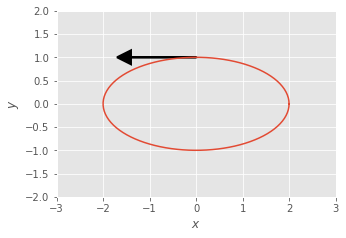

In [6]:
t0 = np.pi/2.
a, b, w = 2, 1, 1
fx  = lambda t:    a*np.cos(w*t)
fy  = lambda t:    b*np.sin(w*t)
fxp = lambda t: -w*a*np.sin(w*t)
fyp = lambda t:  w*b*np.cos(w*t)
gf.line2d(fx, fy, length = 2.*np.pi);
gf.arrow(fx(t0), fy(t0), fxp(t0), fyp(t0));
plt.xlim(-a-1, a+1); plt.ylim(-b-1, b+1);

### Función diferenciable

Hemos visto como son las funciones, diferenciable, pero ¿cómo las definimos matemáticamente? ¿cuándo una función será diferenciable? 


Sea ${\bf f}: D \subset \mathbf{R}^n \to \mathbf{R}^m$, decimos que la función es **diferenciable** en un punto ${\bf x}$ interior a $D$ si en una bola centrada en ${\bf x}$ de radio $r$ y para los vectores que cumplen $\| {\bf v} \| < r$,  existe una *transformación lineal* ${\bf T_x}: \mathbf{R}^n \to \mathbf{R}^m$ y una *función error*, ${\bf E}:\mathbf{R}^n \to \mathbf{R}^m$,  ${\bf E}({\bf x},{\bf v})$, tales que: 

$$
{\bf f}({\bf x}+{\bf v})  = {\bf f}({\bf x}) + {\bf T_x}({\bf v} )+ \| {\bf v} \| {\bf E}({\bf x},{\bf v}) 
$$

donde ${\bf E}({\bf x}, {\bf v})$ es una función error de orden $\mathcal{O}(\| {\bf v} \|)$, que cumple:
$$
\lim_{{\bf v} \to {\bf 0}} {\bf E(x,v)} = {\bf 0} 
$$
Esto es:
$$
\lim_{{\bf v} \to {\bf 0}} \frac{ {\bf f}({\bf x}+{\bf v}) - {\bf f} ({\bf x}) - {\bf T_x}({\bf v} )}{\| {\bf v} \|}  = \lim_{{\bf v} \to {\bf 0}} {\bf E(x,v)} = {\bf 0} 
$$
A ${\bf T_x}$ se llama diferencial o **derivada** de ${\bf f}$ en ${\bf x}$. 

La expresión anterior es el **desarrollo de Taylor** de primer orden de ${\bf f}({\bf x}+{\bf v})$
 


${\bf T_x}$ es la **derivada** de ${\bf f}$ en ${\bf x}$. 

> Si se trata de una función escalar, $f({\bf x})$, es un **gradiente**, $\nabla f({\bf x})$.

> Si se trata de una función vectorial, ${\bf f}({\bf x})$, es **la matriz jacobiana**, ${\bf Df}({\bf x})$

Y te adelanto que:

${\bf T_x}({\bf v})$ es la **derivada direccional** de ${\bf f}({\bf x})$ en el punto ${\bf x}$ y la dirección ${\bf v}$ 

> Si se trata de un función escalar, ${\bf T_x}({\bf v})  = \nabla f({\bf x}) {\bf v}$.

> Si se trata de una función vectorial, ${\bf T_x}({\bf v}) = {\bf Df}({\bf x}) {\bf v}$


#### Propiedades de las funciones diferenciables

*Ejercicios*: Intenta ahora demostrar los siguientes teoremas:

*Teorema*

Si una función ${\bf f}({\bf x})$ de $\mathrm{R}^n \to \mathrm{R}^m$ es diferenciable en un punto interior ${\bf x}$, entonces en continua en ese punto.

*Teorema*

Si una función ${\bf f}({\bf x})$ de $\mathrm{R}^n \to \mathrm{R}^m$ es diferenciable en un punto interior ${\bf x}$, su derivada direccional a lo largo de un vector ${\bf v}$ viene dada por:

> si la función es escalar
$$
f'({\bf x}; {\bf v}) = \nabla f ({\bf x}) \, {\bf v}
$$


> si la función es vectorial
$$
{\bf f}'({\bf x}; {\bf v}) = {\bf Df} ({\bf x}) \, {\bf v}
$$





*Teorema:*  Sean ${\bf f,g}$ dos funciones vectoriales definidas en $S\subset \mathbf{R}^n \to\mathbf{R}^m$; $f, g$ dos campos escalares definidos en $S'\subset \mathbf{R}^n \to \mathbf{R}$ y $\lambda$ un número real. Si son diferenciables en un punto ${\bf x}$, la siguientes funciones también lo son, con la siguiente derivada:

$$
i ) \;\;\;  {\bf f(x)} + {\bf g(x)};  \;\;\; {\bf D[f+g](x)} = {\bf Df(x)} + {\bf Dg(x)} 
$$

$$
ii) \;\;\;  \lambda\, {\bf f(x)}; \;\;\; {\bf D[} \lambda \, {\bf f]} ({\bf x}) = \lambda \, {\bf Df(x)} 
$$

$$
iii) \;\;\; f ({\bf x}) \, g ({\bf x}); \;\;\; \nabla [f ({\bf x}) \, g({\bf x})] = \nabla f({\bf x}) \, g({\bf x}) + f({\bf x}) \, \nabla g({\bf x}) 
$$

$$
iv) \;\;\; f ({\bf x})/g ({\bf x}); \;\;\; {\text si } \; g({\bf x}) \not= 0\;\;\; \nabla [f({\bf x})/g({\bf x})] = 
\frac{\nabla f({\bf x}) g({\bf x}) - f({\bf x}) \nabla g({\bf x})}{g^2({\bf x})} 
$$

#### Condición suficiente de diferenciabilidad

Si recuerdas un función real de una dimensión, $f(x)$, era diferenciable, tenía desarrollo de Taylor, en un punto interior, $x$, si su derivada, $f'(x)$, era continua en un intervalo centrado en ese punto $x$.


Ahora para funciones escalares, se cumple:

*Teorema*: 

Una función $f({\bf x})$ definida en un dominio $D \subset \mathrm{R}^n \to \mathrm{R}$ es continua si sus derivadas parciales, $f'({\bf x})$, son continuas en una bola en torno a ${\bf x}$.


*Cuestión*: En la siguiente celda están dibujadas dos funciones escalares, $f(x, y)$ de $\mathrm{R}^2 \to \mathrm{R}$, una de ellas es diferenciable en todo el dominio y la otra no. ¿Sabes cual es la diferenciable?

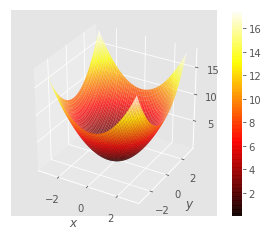

In [7]:
fun1 = lambda x, y : x*x + y*y
gf.graph(fun1);

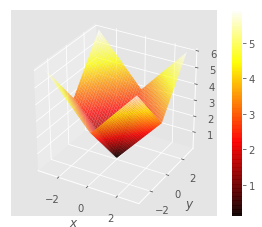

In [8]:
fun2 = lambda x, y : np.abs(x) + np.abs(y)
gf.graph(fun2);

**¡Esto es todo por ahora!**

### Apendices

*Demostración* de la condición suficiente de diferenciabilidad

Lo demostraremos solamente en funciones escalares.

Queremos comprobar que

$$
f({\bf x} + {\bf v}) - f({\bf x}) - \nabla f({\bf x}) {\bf v} = {\bf E}({\bf x}, {\bf v})
$$

y que
$$
\lim_{{\bf v} \to {\bf 0}} {\bf E}({\bf x}, {\bf v}) = 0
$$

Sea el vector ${\bf v}$ con norma $\lambda$ y vector unitario ${\bf u}$. Construimos $n+1$ vectores ${\bf v}_i$, que van incorporando sucesivamente cada coordenada de ${\bf v}$, empezando por ${\bf v}_0 = {\bf 0}$.

$$
{\bf v}  =  \lambda {\bf u}, \; \mathrm{con:  }\; \parallel {\bf u} \parallel = 1, \; \parallel {\bf v} \parallel = \lambda; \; {\bf v} = \lambda \sum_{k=1}^n u_{k} {\bf e}_k 
$$
$$
{\bf v}_0 =  {\bf 0} , \; {\bf v}_k  = \sum_{i=1}^k \lambda u_k; \;\; k=1,\dots,n; \; {\bf v}_n = {\bf v}
$$

Consideramos, por comodidad, los vectores:
$$
{\bf b}_k =  {\bf x} + {\bf v}_k, \; {\bf b}_k = {\bf b}_{k-1} + \lambda u_k {\bf e}_k, \; k = 1, \dots, n
$$


Reescribimos la parte izquierda de la igualdad con una suma telescópica:

$$
f({\bf x}+{\bf v}) - f({\bf x})  = f({\bf x} + {\bf v}_n) - f({\bf x} + {\bf v}_{n-1}) + \dots + f({\bf x}+{\bf v}_1) -f({\bf x}+{\bf v}_0)
$$
$$
  = \sum_{k=1}^n f({\bf x} + {\bf v}_k)-f({\bf x}+{\bf v}_{k-1})  =  \sum_{k=1}^n f({\bf b}_{k} )-f({\bf b}_{k-1}) 
   =  \sum_{k=1}^n f({\bf b}_{k-1} + \lambda u_k {\bf e}_k)-f({\bf b}_{k-1})  
$$

Cada sumando del sumatorio, por ejemplo: $f({\bf b}_{k-1} + \lambda u_k {\bf e}_k)-f({\bf b}_{k-1})$, es simplemente una función de una dimensión, en la coordenada $k$.
Podemos aplicar el teorema del valor medio, un punto ${\bf c}_k$ entre ${\bf b}_{k-1} + \lambda u_k {\bf e}_k$ y ${\bf b}_{k-1}$, y siendo la anchura del intervalo $\lambda u_k$:
$$
  =  \sum_{k=1}^n f({\bf b}_{k-1} + \lambda u_k {\bf e}_k)-f({\bf b}_{k-1})   = \sum_{k=1}^n \lambda u_k f'_{k}({\bf c}_{k})
$$
 
Ahora introducimos un sumando nulo, $\sum_{k=1}^n \lambda u_k \, [f'_k({\bf x}) -f'_k({\bf x})]$, con el fin de obtener el término $\nabla f({\bf x}) \, {\bf v}$:
$$
  =  \sum_{k=1}^n \lambda u_k \, f'_k({\bf c}_k) + \sum_{k=1}^n \lambda u_k \, [f'_k({\bf x}) -f'_k({\bf x})]
$$
$$
 = \nabla f({\bf x}) \cdot {\bf v} + \lambda \sum_{k=1}^{n} [f'_k({\bf c}_k)-f'_k({\bf x}) ] u_k 
$$
Si recuperamos la expresión de función diferenciable:
$$
f({\bf x} + {\bf v}) =  f({\bf x}) + \nabla f({\bf x}) \, {\bf v} + \parallel {\bf v} \parallel E({\bf x}, {\bf v}); \; \mathrm{donde: }\; E({\bf x},{\bf v}) = \sum_{k=1}^{n} [f'_k({\bf c}_k)-f'_k({\bf x})] u_k 
$$

Cuando ${\bf v} \to 0, \; \lambda \to 0$, entonces $\forall k, \: {\bf c}_k \to {\bf x}$. 
*Si las derivadas parciales*, $f'_k({\bf x})$, *son continuas* entoces ${\bf x}$, $E({\bf x},{\bf v}) \to 0$. 
Luego la función es diferenciable. Q.E.D



